In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
for dirname, _,filenames in os.walk('/Desktop/fruits/fruits-360_dataset'):
    for filename in filenames:
        print9os.path.join(dirname,filename)

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import  Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img


In [7]:
train_path = "Desktop/fruits/fruits-360_dataset/fruits-360/Training"
test_path = "Desktop/fruits/fruits-360_dataset/fruits-360/Test"


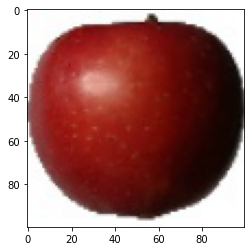

In [8]:
img= load_img(train_path + "/Apple Braeburn/100_100.jpg" )
plt.imshow(img)
plt.axis("on")
plt.show()

In [9]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [10]:
model = Sequential()
model.add(Conv2D(128,3,activation = "relu", input_shape = (100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,activation = "relu"))
model.add(Conv2D(32,3,activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50)) #randomly shutdown some neuron values to prevent computational problems
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(131, activation = "softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer ='SGD', metrics = ['accuracy']) #SGD analyze the learning rate of the alogorithm by selecting minimum random samples while metrics produce accuracy of each step of CNN in the algorithm 

In [12]:
train_data_generator = ImageDataGenerator(rescale =1./255, # each value has 3 color channel
                                         shear_range= 0.2,# the ratio image can rotate at
                                         horizontal_flip =True, # permission for horizintal flip
                                         vertical_flip = False,
                                         zoom_range= 0.3)
test_data_generator = ImageDataGenerator(rescale =1./255)


train_generator = train_data_generator.flow_from_directory(train_path,
                                         target_size= (100,100), #pixel of images in the dataset
                                         batch_size= 32, #allows model to take the first 32 images for processing and takes next 32 afterwards. Its iterative until end of data
                                         color_mode = "rgb",
                                         class_mode= "categorical") #because it is multiclass classification

test_generator = test_data_generator.flow_from_directory(test_path,
                                         target_size= (100,100),
                                         batch_size= 32,
                                         color_mode = "rgb", #a representation of the 3 that was given in the shape of the image above
                                         class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [13]:
from keras.models import load_model
model.save("Fruitclassmodel.h5")


In [14]:
import tensorflow as tf
probability_model =tf.keras.Sequential([model, #gives probability scores of the results obtained from the model
                                       tf.keras.layers.Softmax()])

In [15]:
test_generator.classes[22687]

130

In [16]:
predictions = probability_model.predict(test_generator)

709/709 [==============================] - 400s 563ms/step


In [17]:
pre = predictions[8]
print(pre)

[0.00763521 0.00763548 0.00763299 0.00763998 0.00763583 0.00763236
 0.00763439 0.00763421 0.00763085 0.00763634 0.00763997 0.00764709
 0.00763037 0.00763417 0.0076305  0.00763908 0.00763148 0.00763268
 0.0076306  0.00763898 0.00763201 0.00764206 0.00763853 0.00763192
 0.00763482 0.00765002 0.00763433 0.00763271 0.00763142 0.00763141
 0.00763497 0.00763251 0.00763192 0.00763905 0.00763124 0.00762525
 0.00763098 0.00763254 0.00762873 0.00763354 0.0076342  0.00762883
 0.00763742 0.00763243 0.00762327 0.00762158 0.00764025 0.00763319
 0.00763715 0.00764105 0.00763807 0.00763243 0.00763396 0.00763176
 0.00764165 0.00762867 0.00763138 0.00763847 0.00763034 0.00763778
 0.00762684 0.00763379 0.00764629 0.00763561 0.00762591 0.00763793
 0.00762791 0.00763492 0.0076253  0.00763656 0.00763132 0.00763341
 0.00763185 0.00763167 0.00763637 0.00762444 0.00763372 0.00762815
 0.00762931 0.00763359 0.00763057 0.0076315  0.00762159 0.00763451
 0.00763612 0.0076317  0.00763231 0.00763646 0.00763512 0.0076

In [18]:
np.argmax(pre)

25

In [19]:
import os

folder = "Desktop/fruits/fruits-360_dataset/fruits-360/Test"

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]
print(sub_folders[110])


Potato White
